# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
# Load data and skip the first row
t1_df= pd.read_csv('E:\\Documents\\Turbit\\Turbine1.csv', skiprows=[1], delimiter=';')
t1_df

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,Abgabe,Bezug,KH-Zähl1,KH-Zähl2,KH-DigiE,KH-DigiI,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
0,"01.01.2016, 00:10","5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,0,0,0,0,0,0,0
1,"01.01.2016, 00:20","5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,0,0,0,0,0,0,0
2,"01.01.2016, 00:30","5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,0,0,0,0,0,0,0
3,"01.01.2016, 00:40","6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,0,0,0,0,0,0,0,0
4,"01.01.2016, 00:50","6,9","14,5","457,4","161,1",31533206,5743049,48371,46008,20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13098,"31.03.2016, 23:10","5,2",10,"228,2","359,1",32300592,5866558,49430,46892,"16,2",...,1595,71,0,0,0,0,0,0,0,0
13099,"31.03.2016, 23:20","5,3",10,"237,8","359,7",32300592,5866593,49430,46892,17,...,1595,71,0,0,0,0,0,0,0,0
13100,"31.03.2016, 23:30","5,2",10,"209,9","0,3",32300592,5866632,49430,46892,17,...,1595,71,0,0,0,0,0,0,0,0
13101,"31.03.2016, 23:40","5,2",10,"220,5",0,32300592,5866670,49430,46892,17,...,1595,71,0,0,0,0,0,0,0,0


# Data Exploration and Preprocessing
- Print column names
- Display info on dataset including column datatypes and non-null count
- Convert `Dat/Zeit` from datatype Object to DateTime
- Set `Dat/Zeit` as index
- Replace commas with decimal point and change datatype from Object to Float for the following columns:
    - `Leistung`
    - `Wind`
    - `Rotor`
    - `Azimut`
    - `Gen1-`
    - `Lager`

In [3]:
#Print column names
print(t1_df.columns)

Index(['         Dat/Zeit', '  Wind', 'Rotor', 'Leistung', 'Azimut',
       '   Prod. 1', '   Prod. 2', 'BtrStd 1', 'BtrStd 2', 'Gen1-', 'Lager',
       'Außen', 'GetrT', ' Status', 'Spann', 'Spann.1', 'Spann.2', 'Strom-',
       'Strom-.1', 'Strom-.2', 'CosPh', '    Abgabe', '     Bezug',
       '  KH-Zähl1', '  KH-Zähl2', '  KH-DigiE', '  KH-DigiI', '  KH-Ana-1',
       '  KH-Ana-2', '  KH-Ana-3', '  KH-Ana-4'],
      dtype='object')


In [4]:
#Print Information on the dataset
t1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13103 entries, 0 to 13102
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0            Dat/Zeit  13103 non-null  object
 1     Wind             13103 non-null  object
 2   Rotor              13103 non-null  object
 3   Leistung           13103 non-null  object
 4   Azimut             13103 non-null  object
 5      Prod. 1         13103 non-null  int64 
 6      Prod. 2         13103 non-null  int64 
 7   BtrStd 1           13103 non-null  int64 
 8   BtrStd 2           13103 non-null  int64 
 9   Gen1-              13103 non-null  object
 10  Lager              13103 non-null  object
 11  Außen              13103 non-null  object
 12  GetrT              13103 non-null  object
 13   Status            13103 non-null  int64 
 14  Spann              13103 non-null  object
 15  Spann.1            13103 non-null  object
 16  Spann.2            13103 non-null  objec

In [5]:
#convert Datum/zeit from object to datetime
t1_df['         Dat/Zeit'] = pd.to_datetime(t1_df['         Dat/Zeit'])

#set Datum/zeit as index
t1_df.set_index('         Dat/Zeit', inplace=True)
t1_df

,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,Lager,...,Abgabe,Bezug,KH-Zähl1,KH-Zähl2,KH-DigiE,KH-DigiI,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
Dat/Zeit,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:10:00,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8","53,4",...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:20:00,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8","53,4",...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:30:00,"5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9","53,7",...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:40:00,"6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",54,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:50:00,"6,9","14,5","457,4","161,1",31533206,5743049,48371,46008,20,"57,2",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31 23:10:00,"5,2",10,"228,2","359,1",32300592,5866558,49430,46892,"16,2","51,8",...,1595,71,0,0,0,0,0,0,0,0
2016-03-31 23:20:00,"5,3",10,"237,8","359,7",32300592,5866593,49430,46892,17,"52,3",...,1595,71,0,0,0,0,0,0,0,0
2016-03-31 23:30:00,"5,2",10,"209,9","0,3",32300592,5866632,49430,46892,17,52,...,1595,71,0,0,0,0,0,0,0,0


In [6]:
# Replace commas with a decimal point and convert to float
t1_df['Leistung'] = t1_df['Leistung'].str.replace(',', '.').astype(float)
t1_df['  Wind'] = t1_df['  Wind'].str.replace(',', '.').astype(float)
t1_df['Rotor'] = t1_df['Rotor'].str.replace(',', '.').astype(float)
t1_df['Azimut'] = t1_df['Azimut'].str.replace(',', '.').astype(float)
t1_df['Gen1-'] = t1_df['Gen1-'].str.replace(',', '.').astype(float)
t1_df['Lager'] = t1_df['Lager'].str.replace(',', '.').astype(float)
t1_df

,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,Lager,...,Abgabe,Bezug,KH-Zähl1,KH-Zähl2,KH-DigiE,KH-DigiI,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
Dat/Zeit,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:10:00,5.8,10.0,268.5,161.4,31533151,5742941,48371,46008,14.8,53.4,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:20:00,5.8,10.0,268.5,161.4,31533151,5742941,48371,46008,14.8,53.4,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:30:00,5.8,10.0,272.1,160.6,31533151,5742983,48371,46008,15.9,53.7,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:40:00,6.4,10.0,320.1,162.0,31533151,5743039,48371,46008,17.7,54.0,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:50:00,6.9,14.5,457.4,161.1,31533206,5743049,48371,46008,20.0,57.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31 23:10:00,5.2,10.0,228.2,359.1,32300592,5866558,49430,46892,16.2,51.8,...,1595,71,0,0,0,0,0,0,0,0
2016-03-31 23:20:00,5.3,10.0,237.8,359.7,32300592,5866593,49430,46892,17.0,52.3,...,1595,71,0,0,0,0,0,0,0,0
2016-03-31 23:30:00,5.2,10.0,209.9,0.3,32300592,5866632,49430,46892,17.0,52.0,...,1595,71,0,0,0,0,0,0,0,0


# Feature Engineering

- Split dataset into Features (`Wind`) and Target (`Leistung`)
- Split X and Y into training set and test set
- Reshape input data to train RF Model
- Scale input data using Standard Scaler
- Convert data back to Dataframe form

In [7]:
# Split the data into features (X) and target variable (y)
X =  t1_df['  Wind']
y = t1_df['Leistung']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for RF regressor before scaling
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

# Scale the reshaped feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

In [8]:
# Convert the scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=['  Wind'])
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=['  Wind'])

# Model Training and Testing

For this problem **Random Forests Regressor** was chosen as the ML model due to its capability of capturing complex, non-linear relationships between features and the target variable (Power). Also since its an ensemble approach, it  improves the robustness and generalization of the model. However, although its less prone to overfitting, rf regressor can still overfit noisy data. The model might also face a limitation in making accurate predictions beyond the range of values in the training dataset.

In [9]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled_df, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled_df)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2659.266539912996


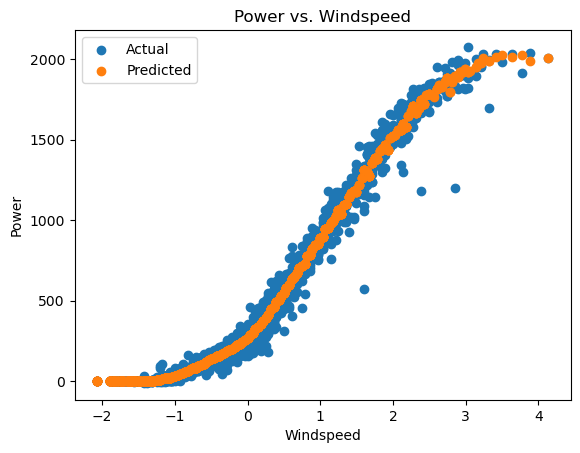

In [10]:
# Visualize the results
plt.scatter(X_test_scaled_df, y_test, label='Actual')
plt.scatter(X_test_scaled_df, y_pred, label='Predicted')
plt.title('Power vs. Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Power')
plt.legend()
plt.show()


# Training Additional Features

Steps applied in feature engineering and model training and testing were repeated using different features to test the effect of using more features

Wind and Rotor

In [11]:
# Including Rotor in the feature vector
X1 = t1_df[['  Wind', 'Rotor']] 
y1 = t1_df['Leistung']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Scale the reshaped features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Create and train the Random Forest Regressor model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X1_train_scaled, y1_train)

# Convert the scaled data back to DataFrame
X1_train_scaled_df = pd.DataFrame(X1_train_scaled, index=X1_train.index, columns=['  Wind', 'Rotor'])
X1_test_scaled_df = pd.DataFrame(X1_test_scaled, index=X1_test.index, columns=['  Wind', 'Rotor'])

# Make predictions on the test set
y1_pred = model1.predict(X1_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y1_test, y1_pred)

print('Mean Squared Error: ', mse)

Mean Squared Error:  2209.155209920817


Wind, Rotor and Azimut

In [12]:
X1 = t1_df[['  Wind', 'Rotor', 'Azimut']]
y1 = t1_df['Leistung']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize the reshaped features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Create and train the Random Forest Regressor model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X1_train_scaled, y1_train)

# Convert the scaled data back to DataFrame
X1_train_scaled_df = pd.DataFrame(X1_train_scaled, index=X1_train.index, columns=['  Wind', 'Rotor', 'Azimut'])
X1_test_scaled_df = pd.DataFrame(X1_test_scaled, index=X1_test.index, columns=['  Wind', 'Rotor', 'Azimut'])

# Make predictions on the test set
y1_pred = model1.predict(X1_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y1_test, y1_pred)

print('Mean Squared Error: ', mse)

Mean Squared Error:  2419.532836019238


Wind, Rotor, Azimut, Gen1-, Lager

In [13]:
# Including Rotor and Azimut in the feature vector
X1 = t1_df[['  Wind', 'Rotor', 'Azimut', 'Gen1-', 'Lager']]
y1 = t1_df['Leistung']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize the reshaped features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Create and train the Random Forest Regressor model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X1_train_scaled, y1_train)

# Convert the scaled data back to DataFrame
X1_train_scaled_df = pd.DataFrame(X1_train_scaled, index=X1_train.index, columns=['  Wind', 'Rotor', 'Azimut',  'Gen1-', 'Lager'])
X1_test_scaled_df = pd.DataFrame(X1_test_scaled, index=X1_test.index, columns=['  Wind', 'Rotor', 'Azimut', 'Gen1-', 'Lager'])

# Make predictions on the test set
y1_pred = model1.predict(X1_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y1_test, y1_pred)

print('Mean Squared Error: ', mse)

Mean Squared Error:  1930.4713065947344


The model performance (MSE) improved when increasing the features (Max 5 features were used) as the model was able to capture more patterns.

# Anomalies

- Calculate residuals and add it to the test df
- Plot a histogram to visualize the distribution of residuals
- Plot the residuals over timestamps
- Set a threshold based on the visualizaton
- Print timestamps that are considered Anomalies

In [14]:
# Calculate residuals
residuals = y1_test - y1_pred

# Add the residuals to the DataFrame
X1_test_scaled_df['Residuals'] = residuals

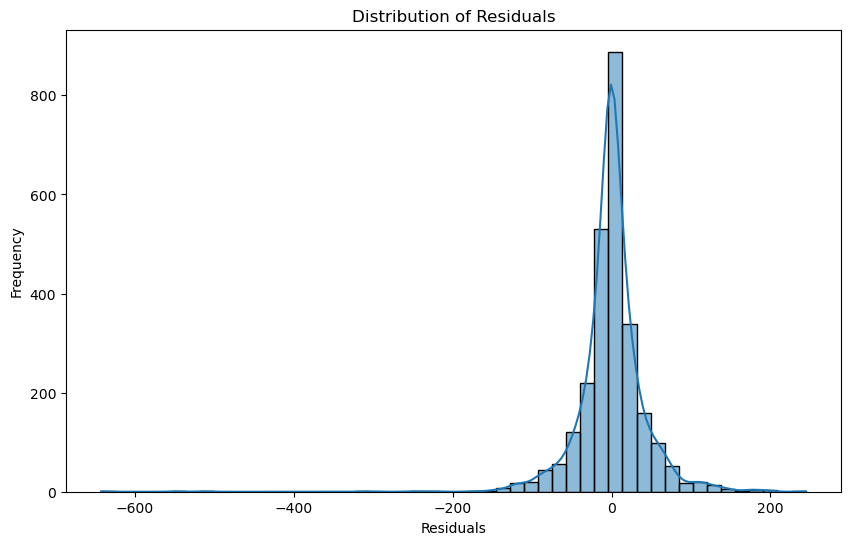

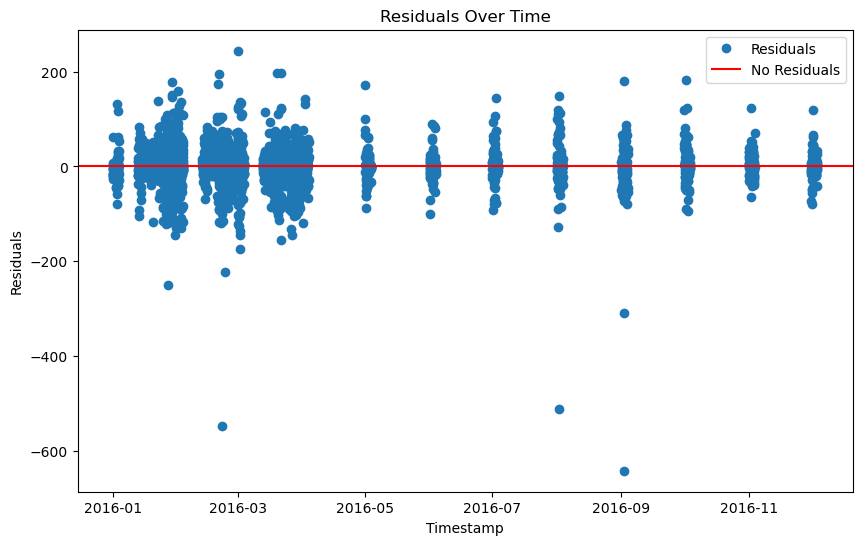

In [15]:
# Plot a histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot a time series of residuals
plt.figure(figsize=(10, 6))
plt.plot(X1_test_scaled_df.index, residuals, marker='o', linestyle='', label='Residuals')
plt.axhline(y=0, color='red',label='No Residuals')
plt.title('Residuals Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [19]:
#Loop over dataframe and return timestamps with residuals above the threshold
for index, row in X1_test_scaled_df.iterrows():
    timestamp = index
    residual = row['Residuals']
    anomaly_threshold = 200
    is_anomaly = abs(residual) > anomaly_threshold
    if (is_anomaly):
        # Print or store the results
        print(f'Timestamp: {timestamp}, Residual: {residual}')

Timestamp: 2016-01-27 15:00:00, Residual: -249.26900000000046
Timestamp: 2016-02-22 04:10:00, Residual: -547.1959999999997
Timestamp: 2016-09-02 04:00:00, Residual: -309.45299999999884
Timestamp: 2016-03-01 01:00:00, Residual: 244.31399999999962
Timestamp: 2016-08-02 04:10:00, Residual: -512.1349999999989
Timestamp: 2016-09-02 04:10:00, Residual: -642.2530000000008
Timestamp: 2016-02-23 17:50:00, Residual: -223.31399999999968
